<a href="https://colab.research.google.com/github/park1NG/MLTeamProject/blob/main/1%EC%B0%A8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,337 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and di

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rc('font', family='NanumBarunGothic') 

In [5]:
path = './airportal16_18년도.csv'
path1 = './airportal19년도.csv'
df = pd.read_csv(path)
df1 = pd.read_csv(path1)

In [6]:
df.shape

(490036, 9)

In [7]:
df.head()

,연월일,항공사,편명,출발지,계획,예상,도착,구분,현황
0,2016-01-01,에티하드,EY873,AUH(아부다비 국제공항),00:05,00:05,00:11,여객,출발
1,2016-01-01,카타르항공,QR859,DOH(도하),00:05,00:05,00:30,여객,출발
2,2016-01-01,에미레이트항공,EK323,DXB(두바이),00:10,23:50,00:20,여객,출발
3,2016-01-01,싱가폴항공,SQ603,SIN(싱가포르),00:10,00:10,00:15,여객,출발
4,2016-01-01,터키항공,TK091,IST(아타튀르크),00:20,00:05,00:55,여객,출발


In [8]:
df.dtypes

연월일    object
항공사    object
편명     object
출발지    object
계획     object
예상     object
도착     object
구분     object
현황     object
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

def data_preprocessing(df):
    df.dropna()
    
    df = df.drop(df[df['예상'] == ':'].index)
    df = df.drop(df[df['도착'] == ':'].index)

    df['연월일'] = df['연월일'].astype(str)
    df['년'] = df['연월일'].str[:4].astype(int)
    df['월'] = df['연월일'].str[5:7].astype(int)
    df['일'] = df['연월일'].str[8:10].astype(int)

    df['예상'] = df['예상'].astype(str)
    df['예상_1'] = df['예상'].str[:2].astype(int)
    df['예상_2'] = df['예상'].str[3:].astype(int)

    df['도착'] = df['도착'].astype(str)
    df['도착_1'] = df['도착'].str[:2].astype(int)
    df['도착_2'] = df['도착'].str[3:].astype(int)

    df = df[['년', '월', '일', '항공사', '편명', '출발지', '예상_1', '예상_2', '도착_1', '도착_2', '현황']]
    # for col in list(set(df.columns) - set(categorical)):
    #     df = df.astypes({col:'float64'})
    
    categorical = ['항공사', '편명', '출발지', '현황']
    label_encoder = LabelEncoder()
    for col in categorical:
        df[col] = label_encoder.fit_transform(df[col])
        df = df.astype({col:'int'})

    df.info()

    return df

In [18]:
data_train = df.copy()
data_train = data_preprocessing(data_train)
data_test = df1.copy()
data_test = data_preprocessing(data_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487399 entries, 0 to 490035
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   년       487399 non-null  int64
 1   월       487399 non-null  int64
 2   일       487399 non-null  int64
 3   항공사     487399 non-null  int64
 4   편명      487399 non-null  int64
 5   출발지     487399 non-null  int64
 6   예상_1    487399 non-null  int64
 7   예상_2    487399 non-null  int64
 8   도착_1    487399 non-null  int64
 9   도착_2    487399 non-null  int64
 10  현황      487399 non-null  int64
dtypes: int64(11)
memory usage: 44.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182019 entries, 0 to 184516
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   년       182019 non-null  int64
 1   월       182019 non-null  int64
 2   일       182019 non-null  int64
 3   항공사     182019 non-null  int64
 4   편명      182019 non-null  int64
 5   출발지     18201

In [19]:
data_train.columns = ['년', '월', '일', '항공사', '편명', '도착지', '예상_1', '예상_2', '출발_1', '출발_2', '현황']
data_test.columns = ['년', '월', '일', '항공사', '편명', '도착지', '예상_1', '예상_2', '출발_1', '출발_2', '현황']

In [21]:
print(data_train['년'].max())
print(data_train['월'].max())
print(data_train['일'].max())
print(data_train['항공사'].max())
print(data_train['편명'].max())
print(data_train['도착지'].max())
print(data_train['예상_1'].max())
print(data_train['예상_2'].max())
print(data_train['출발_1'].max())
print(data_train['출발_2'].max())

2018
12
31
88
1767
245
23
59
23
59


In [22]:
df_normalized = data_train.copy()
df_normalized['년'] = df_normalized['년'] / 2018
df_normalized['월'] = df_normalized['월'] / 12
df_normalized['일'] = df_normalized['일'] / 31
df_normalized['항공사'] = df_normalized['항공사'] / 88
df_normalized['편명'] = df_normalized['편명'] / 1767
df_normalized['도착지'] = df_normalized['도착지'] / 245
df_normalized['예상_1'] = df_normalized['예상_1'] / 23
df_normalized['예상_2'] = df_normalized['예상_2'] / 59
df_normalized['출발_1'] = df_normalized['출발_1'] / 23
df_normalized['출발_2'] = df_normalized['출발_2'] / 59

In [23]:
df_normalized.head()

,년,월,일,항공사,편명,도착지,예상_1,예상_2,출발_1,출발_2,현황
0,0.999009,0.083333,0.032258,0.556818,0.249576,0.036735,0.0,0.084746,0.0,0.186441,1
1,0.999009,0.083333,0.032258,0.795455,0.757216,0.204082,0.0,0.084746,0.0,0.508475,1
2,0.999009,0.083333,0.032258,0.431818,0.246180,0.224490,1.0,0.847458,0.0,0.338983,1
3,0.999009,0.083333,0.032258,0.340909,0.814941,0.751020,0.0,0.169492,0.0,0.254237,1
4,0.999009,0.083333,0.032258,0.852273,0.833050,0.391837,0.0,0.084746,0.0,0.932203,1


In [ ]:
test = pd.DataFrame()

In [ ]:
test['날짜'] = df.apply(lambda x: f"{x['년']}{str(x['월']).zfill(2)}{str(x['일']).zfill(2)}", axis=1)
test['날짜'] = test['날짜'].astype('int')

In [ ]:
test['항공사'] = df['항공사'].copy()
test['편명'] = df['편명'].copy()
test['출발지'] = df['출발지'].copy()

In [ ]:
test['도착'] = df.apply(lambda x: f"{str(x['도착_1'])}{str(x['도착_2']).zfill(2)}", axis=1)
test['도착'] = test['도착'].astype('int')
test['출발'] = df.apply(lambda x: f"{str(x['출발_1'])}{str(x['출발_2']).zfill(2)}", axis=1)
test['출발'] = test['출발'].astype('int')

In [ ]:
test['현황'] = df['현황'].copy()

In [ ]:
print(test['날짜'].max())
print(test['도착'].max())
print(test['출발'].max())

20181231
2359
2359


In [ ]:
test_normalized = test.copy()
test_normalized['날짜'] = test['날짜'] / 20181231
test_normalized['항공사'] = test['항공사'] / 88
test_normalized['편명'] = test['편명'] / 1767
test_normalized['출발지'] = test['출발지'] / 245
test_normalized['도착'] = test['도착'] / 2359
test_normalized['출발'] = test['출발'] / 2359

In [ ]:
test.head()

,날짜,항공사,편명,출발지,도착,출발,현황
0,20160101,49,441,9,5,11,1
1,20160101,70,1338,50,5,30,1
2,20160101,38,435,55,2350,20,1
3,20160101,30,1440,184,10,15,1
4,20160101,75,1472,96,5,55,1


In [ ]:
test_normalized.head()

,날짜,항공사,편명,출발지,도착,출발,현황
0,0.998953,0.556818,0.249576,0.036735,0.002120,0.004663,1
1,0.998953,0.795455,0.757216,0.204082,0.002120,0.012717,1
2,0.998953,0.431818,0.246180,0.224490,0.996185,0.008478,1
3,0.998953,0.340909,0.814941,0.751020,0.004239,0.006359,1
4,0.998953,0.852273,0.833050,0.391837,0.002120,0.023315,1


In [ ]:
test.dtypes

날짜     int64
항공사    int64
편명     int64
출발지    int64
도착     int64
출발     int64
현황     int64
dtype: object

<Axes: >

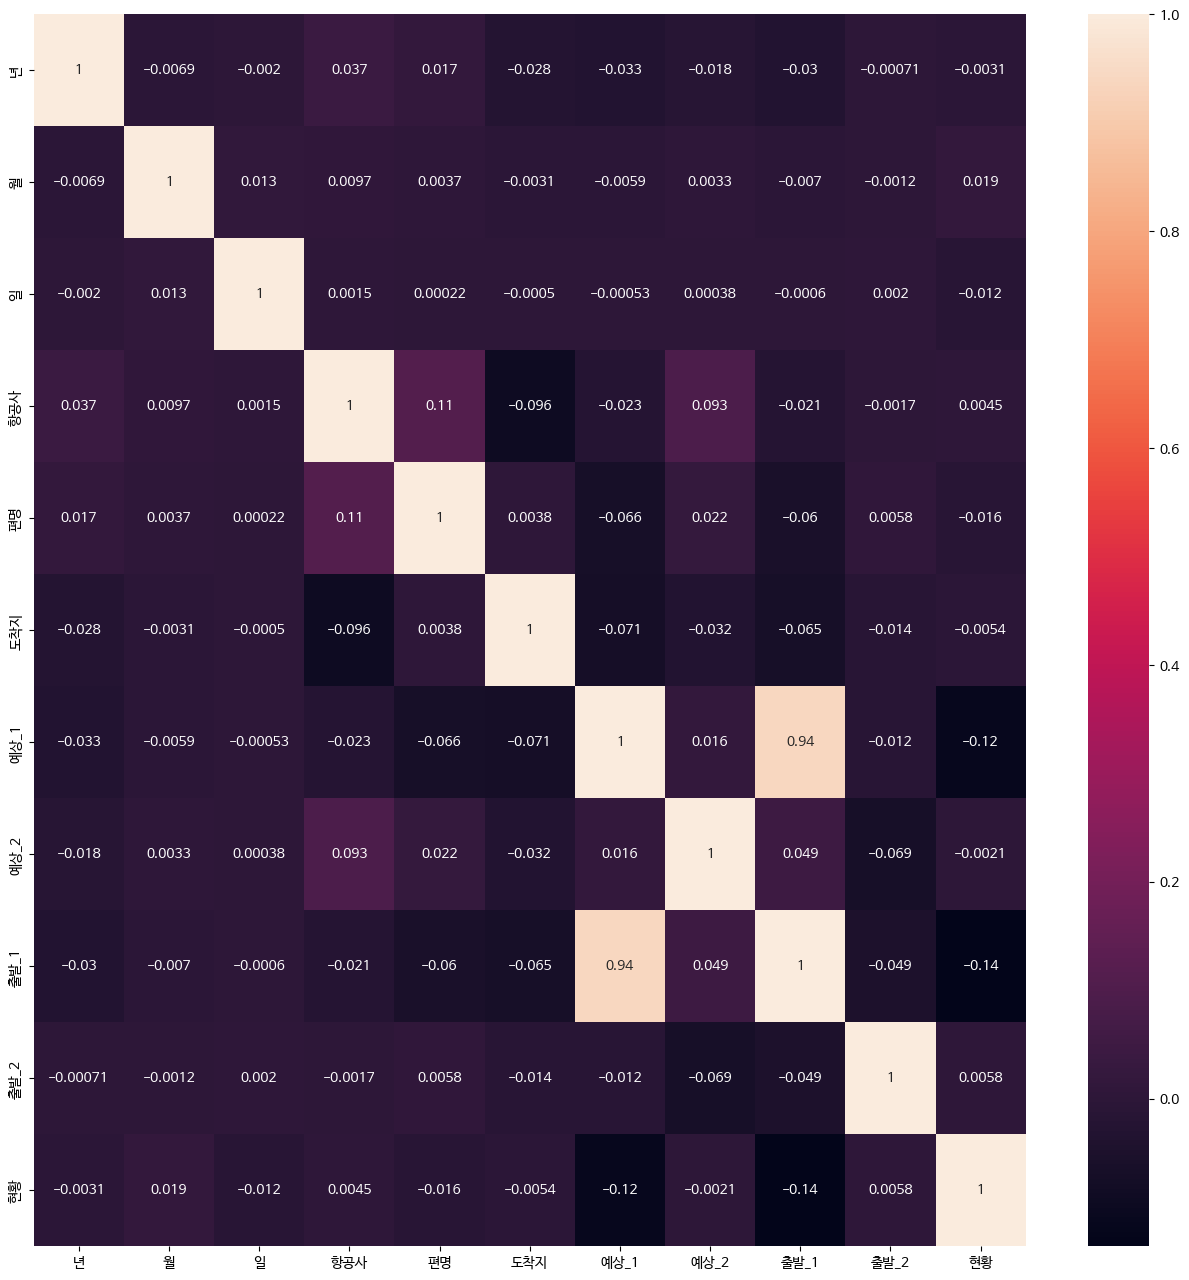

In [24]:
plt.figure(figsize = (16,16))
sns.heatmap(data_train.corr(),annot=True)

<Axes: >

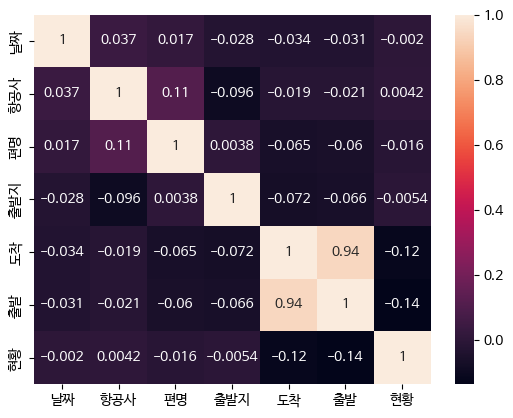

In [ ]:
sns.heatmap(test.corr(),annot=True)

<Axes: >

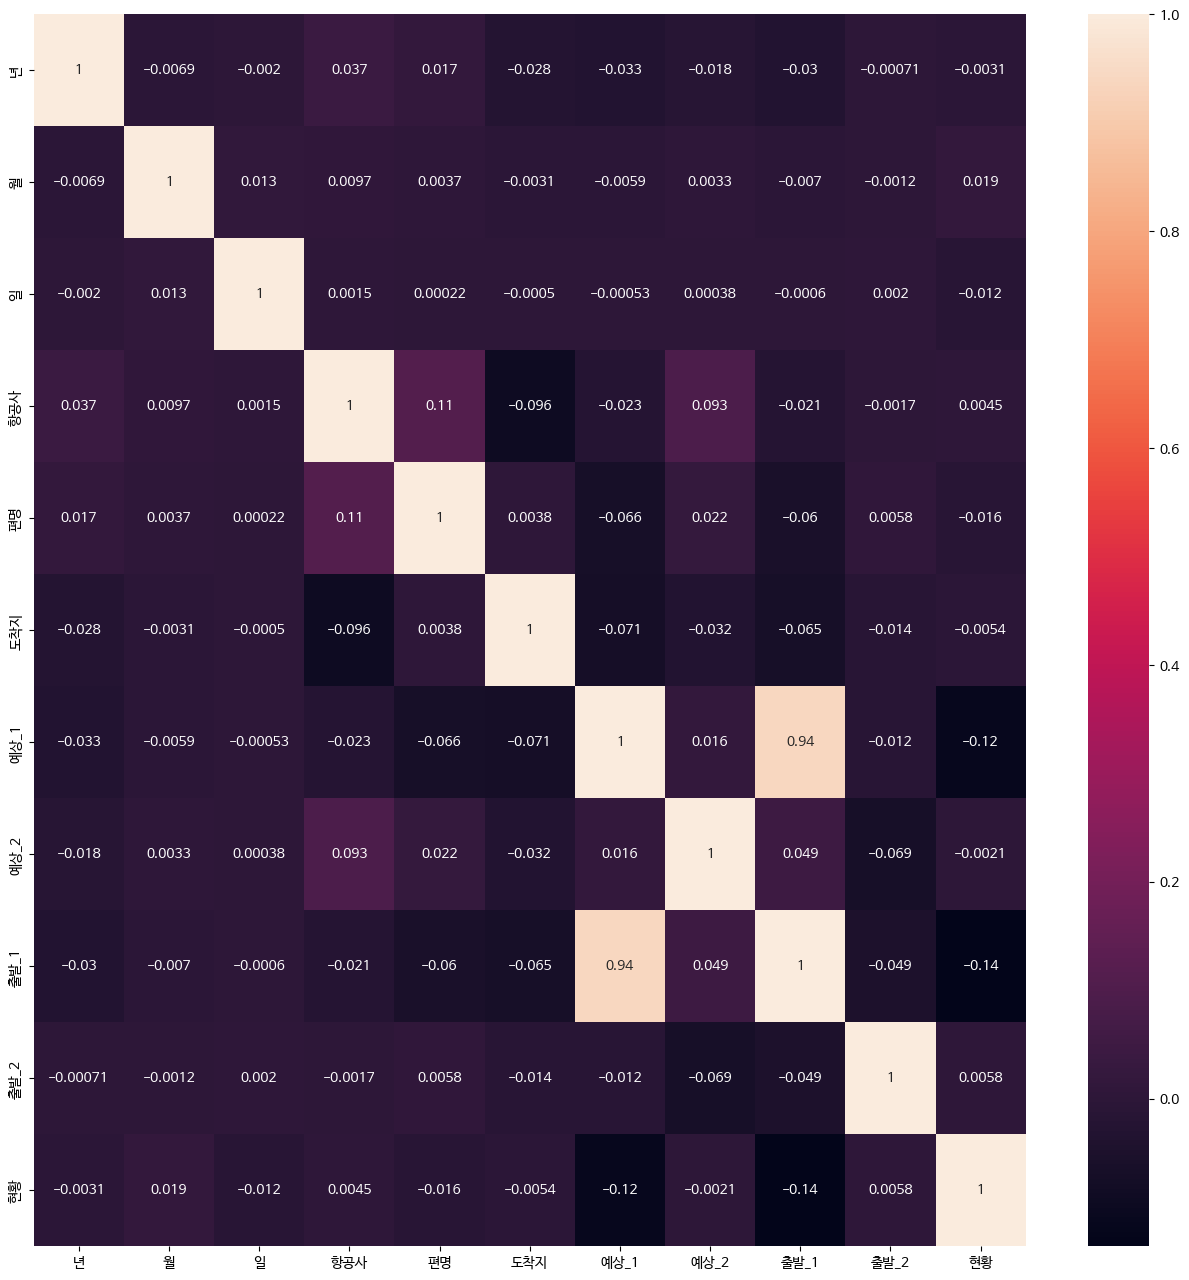

In [25]:
plt.figure(figsize = (16,16))
sns.heatmap(df_normalized.corr(),annot=True)

<Axes: >

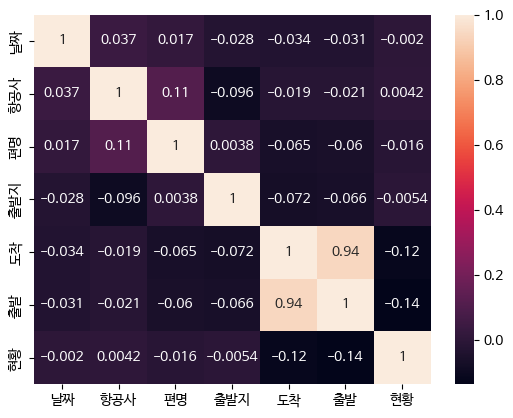

In [ ]:
sns.heatmap(test_normalized.corr(),annot=True)